In [82]:
import polars as pl
import matplotlib.pyplot as plt

In [78]:
trades = pl.read_ndjson('./logs/backtest_trades.jsonl')
trades = trades.to_dummies(columns=["open_method", "spr_method"]).drop('spr_method_lr', 'open_method_reverse_static'
            ).rename({'spr_method_dist': 'spr_method', 'open_method_direct': 'om_dir', 'open_method_reverse_dynamic': 'om_rd'})
trades = trades.with_columns(
        ((pl.col('close_ts') - pl.col('open_ts')) / 60).cast(pl.Int64).alias('duration_min')
    )

In [79]:
trades.sample(2)

open_price_2,hurst_12h,token_1,pv_1,spread_rsi_1h,dist_in,beta_2_180d,profit_sensitivity_12h_pos,profit_sensitivity_wind_neg,std_2_180d,sol_corr_1,close_price_1,pos_side,tls_beta_wind,profit_sensitivity_12h_neg,half_life_log_spread,rsi_t2_5m,mean_wind,beta_1_180d,dist_out,total_profit,profit_sensitivity_wind_mean,sol_corr_2,tls_beta_180d,token_2,half_life_lr_spread,reason,profit_sensitivity_12h_mean,trend_12h,hurst_wind,mean_12h,coint_180d,out_,profit_1,rsi_t2_1h,eth_corr_2,qty_2,om_dir,om_rd,std_1_12h,qty_1,open_price_1,rsi_t1_5m,profit_2,rsi_t1_1h,spread_rsi_5m,johansen_beta_180d,wind,in_,open_ts,btc_corr_1,btc_corr_2,eth_corr_1,std_1_180d,mean_diff,fees,close_ts,close_price_2,tls_beta_12h,trend_wind,pv_2,std_1_wind,std_2_wind,std_2_12h,profit_sensitivity_wind_pos,spr_method,duration_min
f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,i64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,u8,u8,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,u8,i64
0.01455,0.547188,"""BLUR""",0.018436,79.932196,0.23,1.253202,-0.853159,-0.893168,0.072751,0.8134,0.03446,2,1.567849,-0.851626,6.338366,13.824578,0.795645,0.756174,0.21,8.41269,-0.891151,0.840132,1.439132,"""BRETT""",7.800332,1,-0.852391,2.067384,0.532991,0.793755,0,0.37,2.590053,15.552098,0.831679,6850.0,0,1,0.014445,2815.0,0.03545,20.777188,5.822637,16.666601,83.098287,1.329738,72,1.66,1764553175,0.703635,0.788359,0.777866,0.049903,-0.237529,0.40216,1764626235,0.01543,1.894648,0.211499,0.019056,0.00888,0.015739,0.029949,-0.889127,1,1217
0.1098,0.674074,"""OM""",0.0204,91.664793,0.64,0.818279,-2.524141,-3.163757,0.05901,0.658032,0.09231,2,0.566713,-2.94544,9999.0,36.301805,-0.369153,1.111865,0.18,-1.368015,-2.943745,0.701866,0.889572,"""S""",9999.0,2,-2.727995,-35.097613,0.630458,-0.335926,0,0.19,-0.89649,44.211672,0.702595,908.0,0,1,0.031351,1088.0,0.09167,67.128127,-0.471524,89.188575,68.728729,0.851217,96,2.55,1764154810,0.584759,0.63267,0.638856,0.068553,-9.000865,0.399295,1764154955,0.1095,-0.109309,3.801149,0.034325,0.012962,0.006969,0.005692,-2.737483,1,2


In [66]:
long_pos = trades.filter(pl.col('pos_side') == 1)['profit_1', 'profit_2', 'total_profit'].sum()
short_pos = trades.filter(pl.col('pos_side') == 2)['profit_1', 'profit_2', 'total_profit'].sum()

# Такой перекос может быть связан просто с медвежьим рынком
print('Распределение профита в зависимости от направления позиции:')
print(f'Long pos_side. Long leg: {long_pos["profit_1"][0]:.1f}$, short leg: {long_pos["profit_2"][0]:.1f}$,')
print(f'Short pos_side. Long leg: {short_pos["profit_2"][0]:.1f}$, short leg: {short_pos["profit_1"][0]:.1f}$,')

Распределение профита в зависимости от направления позиции:
Long pos_side. Long leg: -9022.5$, short leg: 6643.0$,
Short pos_side. Long leg: -6025.1$, short leg: 3856.4$,


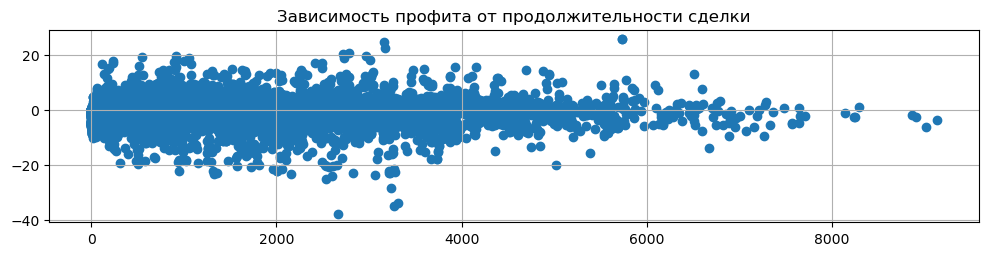

In [88]:
plt.figure(figsize=(12, 2.5))
plt.scatter(trades['duration_min'], trades['total_profit'])
plt.title('Зависимость профита от продолжительности сделки')
plt.grid();

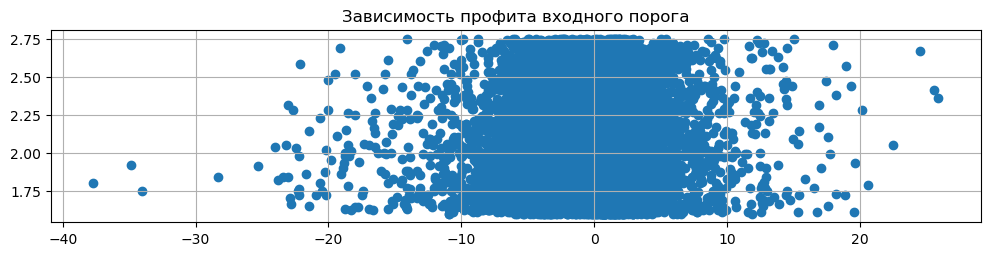

In [95]:
plt.figure(figsize=(12, 2.5))
plt.scatter(trades['total_profit'], trades['in_'])
plt.title('Зависимость профита входного порога')
plt.grid();

In [72]:
trades.columns

['open_price_2',
 'hurst_12h',
 'token_1',
 'pv_1',
 'spread_rsi_1h',
 'dist_in',
 'beta_2_180d',
 'profit_sensitivity_12h_pos',
 'profit_sensitivity_wind_neg',
 'std_2_180d',
 'sol_corr_1',
 'close_price_1',
 'pos_side',
 'tls_beta_wind',
 'profit_sensitivity_12h_neg',
 'half_life_log_spread',
 'rsi_t2_5m',
 'mean_wind',
 'beta_1_180d',
 'dist_out',
 'total_profit',
 'profit_sensitivity_wind_mean',
 'sol_corr_2',
 'tls_beta_180d',
 'token_2',
 'half_life_lr_spread',
 'reason',
 'profit_sensitivity_12h_mean',
 'trend_12h',
 'hurst_wind',
 'mean_12h',
 'coint_180d',
 'out_',
 'profit_1',
 'rsi_t2_1h',
 'eth_corr_2',
 'qty_2',
 'om_dir',
 'om_rd',
 'std_1_12h',
 'qty_1',
 'open_price_1',
 'rsi_t1_5m',
 'profit_2',
 'rsi_t1_1h',
 'spread_rsi_5m',
 'johansen_beta_180d',
 'wind',
 'in_',
 'open_ts',
 'btc_corr_1',
 'btc_corr_2',
 'eth_corr_1',
 'std_1_180d',
 'mean_diff',
 'fees',
 'close_ts',
 'close_price_2',
 'tls_beta_12h',
 'trend_wind',
 'pv_2',
 'std_1_wind',
 'std_2_wind',
 'std_2_1

In [70]:
trades.select('total_profit', 'reason', 'spr_method', 'om_dir', 'om_rd').corr()

total_profit,reason,spr_method,om_dir,om_rd
f64,f64,f64,f64,f64
1.0,-0.63415,-0.069658,0.023701,-0.020985
-0.63415,1.0,0.252079,-0.131465,0.175838
-0.069658,0.252079,1.0,-0.054532,0.034125
0.023701,-0.131465,-0.054532,1.0,-0.608416
-0.020985,0.175838,0.034125,-0.608416,1.0
